# Linear Regression


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [6]:
y

array([0.31899608, 0.92574157, 1.63119771, 1.73840993, 1.56844879,
       2.10224424, 0.52962058, 0.81320797, 2.01664566, 2.98601391,
       2.02717182, 3.67820205, 2.12247217, 1.29459016, 1.81006335,
       2.45649543, 3.13650784, 2.81140529, 2.64534933, 3.72112792,
       3.37305608, 3.67639428, 3.30734143, 2.4799876 , 3.35785485,
       3.49010359, 4.62447002, 3.85167199, 4.25199846, 4.10942843,
       4.90545207, 4.43602123, 4.55917352, 5.58996137, 4.62878475,
       4.04364385, 5.44487181, 4.35583662, 4.29420976, 7.12915493,
       6.0545929 , 7.25019575, 6.18464609, 5.5898401 , 7.02197448,
       5.61635157, 6.62226923, 6.16668677, 6.14866597, 6.51707584])

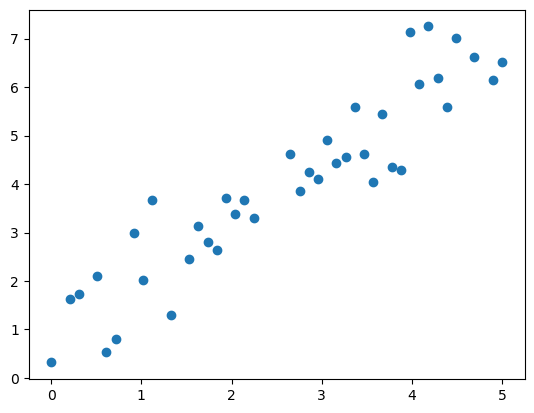

In [7]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [8]:
regr = LinearRegression()
X_train = x_train.reshape(-1,1)
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.18773483]
interception:  0.8999373911456034


In [9]:
Y_train = regr.predict(X_train)

In [10]:
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.48182320644029986


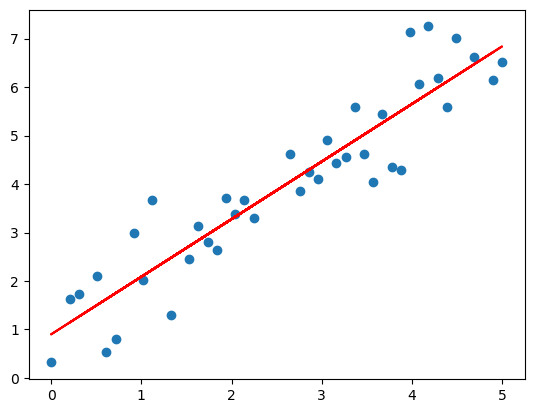

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### test with test data

In [12]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(Y_test)

[2.35430658 2.59670144 1.38472712 1.86951685 6.35382183 1.02113482
 3.92987319 3.80867576 6.5962167  3.68747833]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [13]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.35430658],
       [2.59670144],
       [1.38472712],
       [1.86951685],
       [6.35382183],
       [1.02113482],
       [3.92987319],
       [3.80867576],
       [6.5962167 ],
       [3.68747833]])

In [14]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.33200761188952155


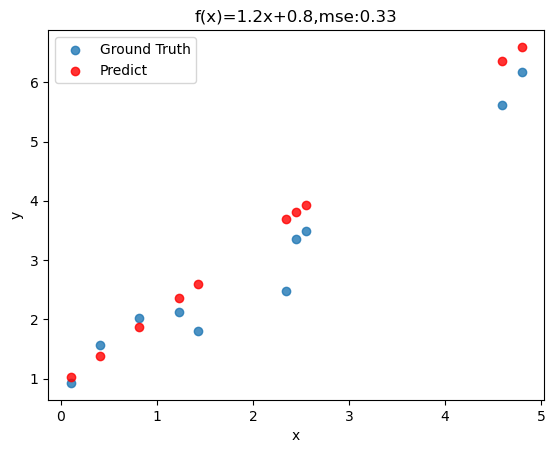

In [15]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()